### 1. IMPORTACIÓN DE LIBRERÍAS (Y OTROS)

El primer paso. Importar las librerías que puedan ser necesarias a lo largo del código así como las configuraciones que creo me ayudarán a lo largo del código (ignorar los warnings o ampliar el máximo de filas "visibles" a 150).

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import matplotlib

from wordcloud import WordCloud

import matplotlib.pyplot as plt
# %matplotlib inline

import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 150)

### 2. LECTURA DEL ARCHIVO Y PRIMEROS PASOS

Lectura del archivo que contiene el dataset. En este caso, un ".csv" separado por ";". Además, le indico que el separador del punto es el separador de miles para evitar conflictos a la hora de convertir la columna de los "Totales" a "int". También tengo que especificar el código "latin1" ya que la importación da error.

Tras la conversión del archivo ".csv" en un dataframe, aplico un ".info" para tener una idea del contenido del mismo. Como veo que contiene bastantes filas, con un ".nunique" obtengo cuántos valores únicos contiene la columna "Causa de muerte" para saber cunántos valores únicos tengo. A continuación, un ".head" para ver la estructura que tiene el DF.

In [3]:
df = pd.read_csv('ESP_tumores_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Causa de muerte  1353 non-null   object
 1   Edad             1353 non-null   object
 2   Sexo             1353 non-null   object
 3   Periodo          1353 non-null   int64 
 4   Total            1353 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 53.0+ KB


In [4]:
df['Causa de muerte'].nunique()

33

In [5]:
df.head()

,Causa de muerte,Edad,Sexo,Periodo,Total
0,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2020,2399
1,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2019,2307
2,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2018,2410
3,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2017,2457
4,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2016,2428


### 3. PROCESO DE LIMPIEZA DE LOS DATOS

Lo primero que hago es eliminar columnas que no vaya a utilizar a lo largo del código, como por ejemplo la de "Edad" y la de "Sexo", ya que no voy a filtrar los datos por estas variables.

Limpio los datos de la columna "Causa de muerte" creando una lista con los nombres saneados.

Elimino las columnas que no vayan a ser necesarias y procedo a obtener los datos únicos de la nueva columna "Causa".

In [6]:
df.drop(['Edad', 'Sexo'], axis=1, inplace=True)

In [7]:
# Aquí limpio los nombres de la columna "Causa de muerte" y los añado a una lista vacía que posteriormente será la columna "Causa".

list = []

for i in df['Causa de muerte']:
    i = i[4:]
    list.append(i)

In [8]:
df['Tipo de cancer'] = list
df.head()

,Causa de muerte,Periodo,Total,Tipo de cancer
0,"009 Tumor maligno del labio, de la cavidad bu...",2020,2399,"Tumor maligno del labio, de la cavidad bucal ..."
1,"009 Tumor maligno del labio, de la cavidad bu...",2019,2307,"Tumor maligno del labio, de la cavidad bucal ..."
2,"009 Tumor maligno del labio, de la cavidad bu...",2018,2410,"Tumor maligno del labio, de la cavidad bucal ..."
3,"009 Tumor maligno del labio, de la cavidad bu...",2017,2457,"Tumor maligno del labio, de la cavidad bucal ..."
4,"009 Tumor maligno del labio, de la cavidad bu...",2016,2428,"Tumor maligno del labio, de la cavidad bucal ..."


In [9]:
df.drop('Causa de muerte', axis = 1, inplace=True)
df.head()

,Periodo,Total,Tipo de cancer
0,2020,2399,"Tumor maligno del labio, de la cavidad bucal ..."
1,2019,2307,"Tumor maligno del labio, de la cavidad bucal ..."
2,2018,2410,"Tumor maligno del labio, de la cavidad bucal ..."
3,2017,2457,"Tumor maligno del labio, de la cavidad bucal ..."
4,2016,2428,"Tumor maligno del labio, de la cavidad bucal ..."


### 4. PRIMER GRÁFICO

Lo primero es crear las variables por cada tipo de causa para después reflejarlas por separado en el gráfico.  Se trata de un gráfico de líneas que reflejará la evolución del total de muertes causadas por tumores a lo largo del periodo de estudio (1980-2020).

In [10]:
df_prostata = df[df['Tipo de cancer'] == ' Tumor maligno de la próstata']
df_mama = df[df['Tipo de cancer'] == ' Tumor maligno de la mama']
df_pancreas = df[df['Tipo de cancer'] == ' Tumor maligno del páncreas']
df_colon = df[df['Tipo de cancer'] == ' Tumor maligno del colon']
df_pulmon = df[df['Tipo de cancer'] == ' Tumor maligno de la tráquea, de los bronquios y del pulmón']

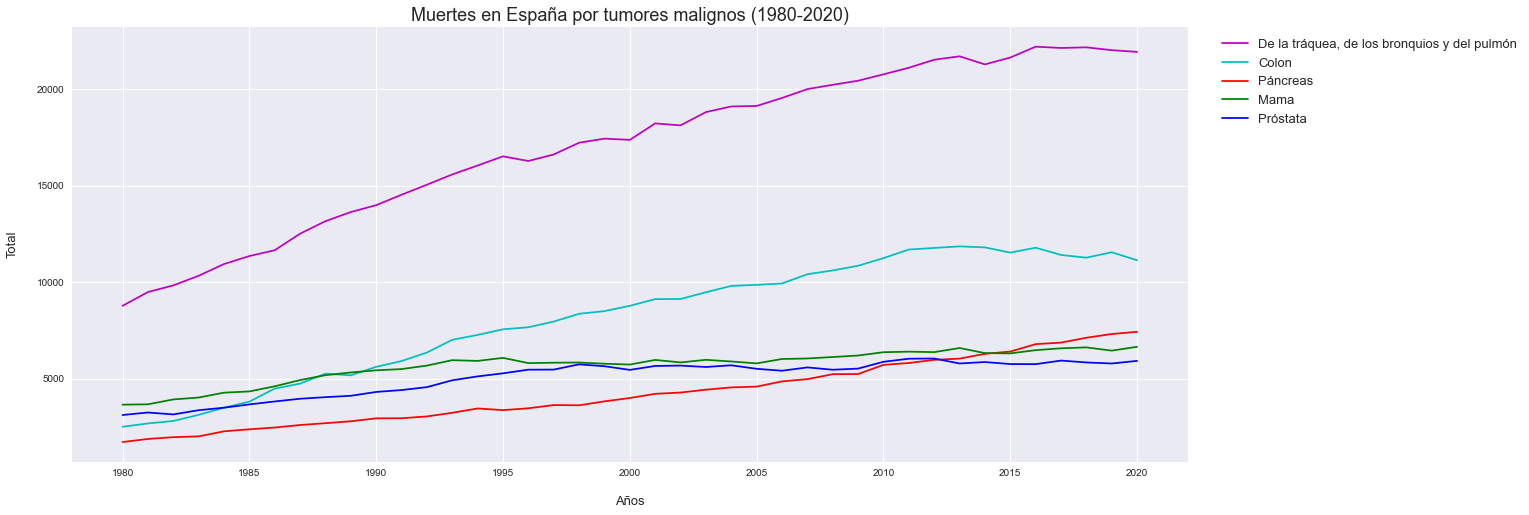

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_pulmon['Periodo'], df_pulmon['Total'], linestyle = '-', color = 'm', label='De la tráquea, de los bronquios y del pulmón')
plt.plot(df_colon['Periodo'], df_colon['Total'], linestyle = '-', color = 'c', label='Colon')
plt.plot(df_pancreas['Periodo'], df_pancreas['Total'], linestyle = '-', color = 'r', label='Páncreas')
plt.plot(df_mama['Periodo'], df_mama['Total'], linestyle = '-', color = 'g', label='Mama')
plt.plot(df_prostata['Periodo'], df_prostata['Total'], linestyle = '-', color = 'b', label='Próstata')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=13)
plt.title('Muertes en España por tumores malignos (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

### 5. SEGUNDO GRÁFICO

Creo las variables con los datos para los años 1980 y 2020 para elaborar un gráfico que comparará los totales de las cinco primeras causas de muerte por tumores en 1980 y 2020.

Finalmente, descarto esta idea y me centro en reflejar con un "treemap" la realidad de estas causas de muerte. Creo el gráfico que reflejará las cinco primeras causas de muerte por tumores en el año 2020.

In [20]:
df_tum_80 = df[df['Periodo'] == 1980]
df_tum_80.sort_values('Total', inplace=True, ascending=False)
df_tum_80.head()

,Periodo,Total,Tipo de cancer
409,1980,8771,"Tumor maligno de la tráquea, de los bronquios..."
122,1980,7612,Tumor maligno del estómago
1106,1980,4571,"Tumor maligno de sitios mal definidos, secund..."
245,1980,4196,Tumor maligno del hígado y vías biliares intr...
614,1980,3656,Tumor maligno de la mama


In [24]:
df_tum_20 = df[df['Periodo'] == 2020]
df_tum_20.sort_values('Total', inplace=True, ascending=False)
df_tum_20.head()

,Periodo,Total,Tipo de cancer
369,2020,21918,"Tumor maligno de la tráquea, de los bronquios..."
123,2020,11131,Tumor maligno del colon
246,2020,7427,Tumor maligno del páncreas
574,2020,6651,Tumor maligno de la mama
779,2020,5922,Tumor maligno de la próstata


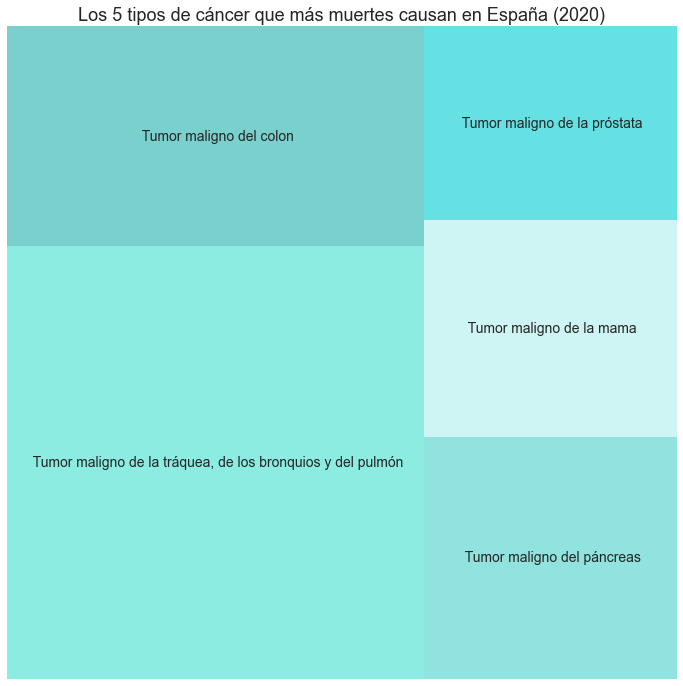

In [27]:
plt.figure(figsize=(12,12))
colors=['turquoise', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'darkturquoise']
squarify.plot(sizes=df_tum_20['Total'].iloc[0:5], alpha=.6, label=df_tum_20['Tipo de cancer'].iloc[0:5], color=colors, text_kwargs={'fontsize':14})
plt.title('Los 5 tipos de cáncer que más muertes causan en España (2020)', size=18, )
plt.axis('off');

### 6. TERCER GRÁFICO

Como veo que, a comparación de las otras dos causas de muerte, en este caso hay muchas más causas, decido crear un "Wordcloud" para intentar mostrar la gran cantidad de causas distintas para un solo grupo de enfermedades. Así que lo primero que hago es obtener un listado con todas las cuasas para comprobar los datos únicos. El siguiente paso es dar forma al gráfico.

In [16]:
df_tum_20['Tipo de cancer'].unique()

array([' Tumor maligno de la tráquea, de los bronquios y del pulmón',
       ' Tumor maligno del colon', ' Tumor maligno del páncreas',
       ' Tumor maligno de la mama', ' Tumor maligno de la próstata',
       ' Tumor maligno del hígado y vías biliares intrahepáticas',
       ' Tumores malignos del tejido linfático, de los órganos hematopoyéticos y de tejidos afines, excepto leucemia',
       ' Tumor maligno del estómago',
       ' Tumor maligno de sitios mal definidos, secundarios y de sitios no especificados',
       ' Tumor maligno de la vejiga',
       ' Tumor maligno del recto, de la porción rectosigmoide y del ano',
       ' Leucemia', ' Tumor maligno del encéfalo',
       ' Otros tumores malignos digestivos',
       ' Otros tumores de comportamiento incierto o desconocido',
       ' Tumor maligno del labio, de la cavidad bucal y de la faringe',
       ' Tumor maligno del riñón, excepto pelvis renal',
       ' Tumor maligno del ovario', ' Tumor maligno del esófago',
       ' Ot

In [17]:
text = " ".join(tipo for tipo in df_tum_20['Tipo de cancer'])

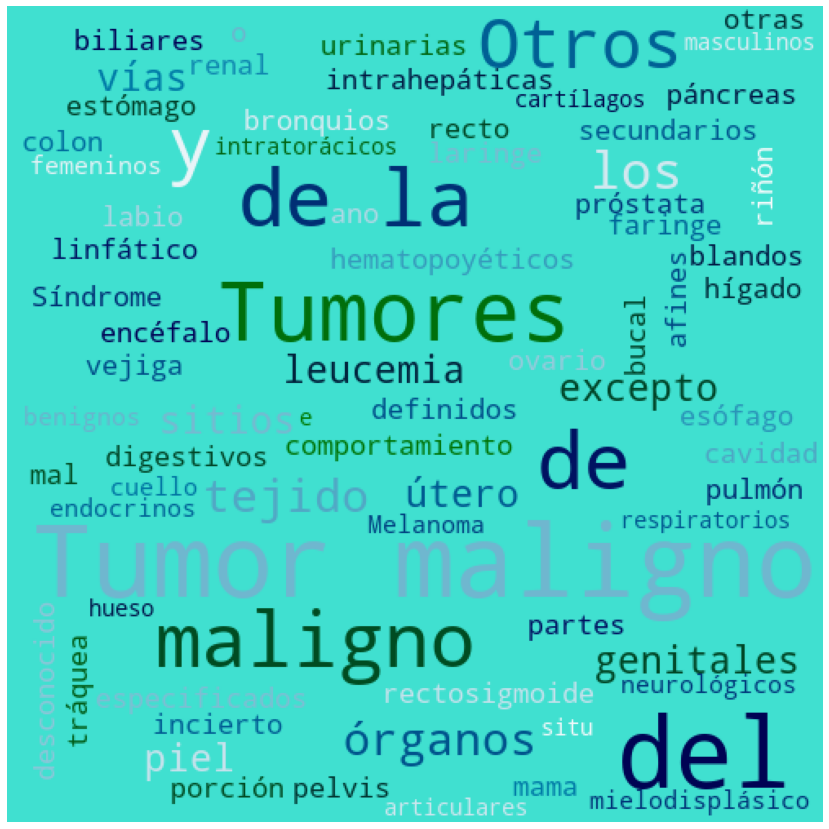

In [18]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(text)
plot_cloud(wordcloud)

In [19]:
# plt.figure(figsize=(15,15))

# word_cloud = WordCloud(width = 500, height = 500, collocations = False, background_color = 'white',  random_state=10).generate(text)

# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()